### Student Information
Name:呂佳芸

Student ID:111071038

GitHub ID:gill9307

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [335]:
### Begin Assignment 


# Data Preparation

In [336]:

import pandas as pd
dataset=pd.read_csv('C:/Users/呂佳芸/DM/DM2025Labs/DM2025-Lab1-Exercise/newdataset/Reddit-stock-sentiment.csv')
dataset[0:5]
len(dataset)
dataset.text
dataset.columns



Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')

Since some of the information in the dataset might not be important, like post_id and author, so we ignore them in our data

In [337]:
data_select=['type', 'datetime', 'subreddit', 'title', 
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label']

data=dataset[data_select]
data[:10]


,type,datetime,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,wallstreetbets,Retardation is on the menu boys! WSB is so back,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,wallstreetbets,Retail giant TARGET has now declined for 10 co...,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,StockMarket,How do you feel about a sitting president maki...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,stockstobuytoday,Who knows more? $VMAR,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,StockMarket,The Trump administration is begging Xi Jinping...,1,NaN,NaN,He didnât say thank you.,0.000000,0.000000,0.0,[],-1.0
5,comment,2025-04-12 2:19:03,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,16,NaN,NaN,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0,"['tonight', 'puss']",0.0
6,comment,2025-04-11 12:37:23,stocks,Is the market in complete denial right now?,5,NaN,NaN,Trump will respond to china increasing their t...,0.380000,-0.108333,-1.0,"['JPow', 'Jerome', 'i', 'reporting', 'Trump', ...",-1.0
7,comment,2025-04-11 17:28:50,wallstreetbets,Retardation is on the menu boys! WSB is so back,-3,NaN,NaN,Confirmed not a trap. Its been like this for p...,0.700000,0.050000,1.0,"['Confirmed', 'mouth', 'word', 'trap']",0.0
8,comment,2021-02-01 15:36:32,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",1,NaN,NaN,Am I the only one seeing the cup & handle brea...,0.491818,0.057045,1.0,"['cup', 'Day', 'handle', 'pivot', 'Green', 'tr...",1.0
9,comment,2021-12-31 16:29:49,stockstobuytoday,Any cheap stocks under $10?,2,NaN,NaN,HLGN is $10. Hurry and catch it now before it ...,0.000000,0.000000,0.0,"['HLGN', 'Hurry', 'moon']",1.0


# Data transformation

In [338]:
data[:10][["text","sentiment"]]

,text,sentiment
0,Calls on retards,-1.0
1,Stunt as in like why did they even make a big ...,1.0
2,Seeing lots of red in the ticker.,0.0
3,Vision Marine Technologies Inc. is rewriting t...,1.0
4,He didnât say thank you.,0.0
5,"Hoping to ejaculate in wet warm puss tonight, ...",1.0
6,Trump will respond to china increasing their t...,-1.0
7,Confirmed not a trap. Its been like this for p...,1.0
8,Am I the only one seeing the cup & handle brea...,1.0
9,HLGN is $10. Hurry and catch it now before it ...,0.0


fetch the records which sentiment is 1(positive)

In [339]:
data.loc[dataset["sentiment"]==1][:5] 
 

,type,datetime,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
1,comment,2025-04-12 1:12:19,wallstreetbets,Retail giant TARGET has now declined for 10 co...,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
3,post,2023-08-30 17:12:55,stockstobuytoday,Who knows more? $VMAR,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
5,comment,2025-04-12 2:19:03,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,16,NaN,NaN,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0,"['tonight', 'puss']",0.0
7,comment,2025-04-11 17:28:50,wallstreetbets,Retardation is on the menu boys! WSB is so back,-3,NaN,NaN,Confirmed not a trap. Its been like this for p...,0.700000,0.050000,1.0,"['Confirmed', 'mouth', 'word', 'trap']",0.0
8,comment,2021-02-01 15:36:32,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",1,NaN,NaN,Am I the only one seeing the cup & handle brea...,0.491818,0.057045,1.0,"['cup', 'Day', 'handle', 'pivot', 'Green', 'tr...",1.0


In [340]:
data[data["sentiment"]==1][::10][0:5]

,type,datetime,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
1,comment,2025-04-12 1:12:19,wallstreetbets,Retail giant TARGET has now declined for 10 co...,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
25,comment,2025-04-12 1:26:19,wallstreetbets,Retail giant TARGET has now declined for 10 co...,4,NaN,NaN,"You see, Target, pissing off a good chunk of y...",0.758333,0.233333,1.0,"['customer', 'base', 'chunk', 'Target', 'idea']",-1.0
56,comment,2025-04-11 13:33:07,stocks,BREAKING: China raises tariffs on U.S. goods t...,-1,NaN,NaN,"To be fair, Chinese exports to the US make up ...",0.466667,0.233333,1.0,"['portion', 'degree', 'US', 'kinda', 'â', 'w...",0.0
73,comment,2025-04-11 15:32:07,stocks,Is the market in complete denial right now?,1,NaN,NaN,"Look, the USA somehow thought a second term f...",0.460000,0.040000,1.0,"['USA', 'fool', 'Look', 'Trump', 'world', 'cul...",-1.0
96,comment,2025-04-12 2:05:07,wallstreetbets,Someone post the hotline please.,1,NaN,NaN,200k loss in a month.. haha,0.300000,0.200000,1.0,"['..', 'month', 'loss', 'haha']",-1.0


In [418]:
data['sentiment_name'] = data.sentiment.apply(
    lambda t: 'negative' if t == -1 
              else ('neutral' if t == 0 else 'positive')
)

C:\Users\呂佳芸\AppData\Local\Temp\ipykernel_29856\503376433.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Data mining using pandas

### Dealing missing values

In [341]:
import helpers.data_mining_helpers as dmh


In [342]:
data.isnull()

,type,datetime,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,False,False,False,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,False,False,False,False,False,True,True,False,False,False,False,False,False
843,False,False,False,False,False,True,True,False,False,False,False,False,False
844,False,False,False,False,False,False,False,False,False,False,False,False,False
845,False,False,False,False,False,True,True,False,False,False,False,False,False


In [343]:
data.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,subreddit,title,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,783,783,0,0,0,0,0,0


In [344]:
data.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)


0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 2)
                        ...                   
842    (The amoung of missing records is: , 2)
843    (The amoung of missing records is: , 2)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 2)
846    (The amoung of missing records is: , 2)
Length: 847, dtype: object

In [345]:
len(data)

847

Now we found that the missing value of two columns(downvotes,upvote_ratio) is too much, we might cosider them as not important feature, so we need to delete them.

If we delete row with null, we will left few data.
So now we decide to delete the columns.

In [346]:
data.drop(columns=["downvotes","upvote_ratio"],inplace=True)

C:\Users\呂佳芸\AppData\Local\Temp\ipykernel_29856\2792768801.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [347]:
data
#len(data)

,type,datetime,subreddit,title,upvotes,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,wallstreetbets,Retardation is on the menu boys! WSB is so back,0,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,wallstreetbets,Retail giant TARGET has now declined for 10 co...,-15,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,StockMarket,How do you feel about a sitting president maki...,1,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,stockstobuytoday,Who knows more? $VMAR,30,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,StockMarket,The Trump administration is begging Xi Jinping...,1,He didnât say thank you.,0.000000,0.000000,0.0,[],-1.0
...,...,...,...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,1,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,['tomorrow'],1.0
843,comment,2025-04-11 5:01:24,StockMarket,$ U.S. dollar value (crashing),2,Where can I read this?,0.000000,0.000000,0.0,[],0.0
844,post,2025-03-24 12:30:39,stockstobuytoday,Analyst Recommendations,1,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
845,comment,2025-04-11 20:13:26,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,10,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0


In [348]:
data.isnull().apply(lambda x: dmh.check_missing_values(x))


,type,datetime,subreddit,title,upvotes,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,0,0,0


In [349]:
len(data)

847

### Dealing duplicate data

In [350]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844    False
845    False
846    False
Length: 847, dtype: bool

In [351]:
sum(data.duplicated())

0

There is not duplicated data, so we don't need to delete any data in this part.

# Data Preprocessing

### Sampling

In [352]:
data_sample=data.sample(n=100)

In [353]:
data_sample[0:10]

,type,datetime,subreddit,title,upvotes,text,subjectivity,polarity,sentiment,entities,label
843,comment,2025-04-11 5:01:24,StockMarket,$ U.S. dollar value (crashing),2,Where can I read this?,0.000000,0.000000,0.0,[],0.0
572,comment,2021-02-01 14:19:34,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",1,I mean silver is used a lot in electronics and...,0.443750,-0.056250,-1.0,"['silver', 'lot']",1.0
88,comment,2022-04-23 20:10:13,stockstobuytoday,Technical Analysis Thread.,1,$FDX - still in downtrend\r\n\r\n[/](/)\r\n\r\...,0.000000,0.000000,0.0,"['ICE', 'FDX', '/', 'x200B', ']', '[']",1.0
725,comment,2025-04-11 14:10:21,wallstreetbets,Weekly Earnings Thread 4/14 - 4/18,2,Itâll stay flat probably,0.125000,-0.025000,-1.0,['stay'],0.0
559,comment,2025-04-11 10:41:45,StockMarket,ð¨China responds to Trumpâs 145% tariff wi...,28,One billion gagillion fafillion shabadabalo sh...,0.000000,0.000000,0.0,"['shabadamillion', 'gagillion', 'fafillion', '...",0.0
73,comment,2025-04-11 15:32:07,stocks,Is the market in complete denial right now?,1,"Look, the USA somehow thought a second term f...",0.460000,0.040000,1.0,"['USA', 'fool', 'Look', 'Trump', 'world', 'cul...",-1.0
11,comment,2025-04-12 2:51:20,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,9,"this sub has ruined emails for me, whenever I ...",0.300000,1.000000,1.0,"['sub', 'WSB', 'Best']",0.0
518,comment,2025-04-11 9:52:45,stocks,r/Stocks Daily Discussion & Fundamentals Frida...,1,I'm reading now about 125% retaliatory tariffs...,0.669345,-0.084821,-1.0,"['news', '..', 'stage', 'reaction', 'cash', '%...",0.0
155,comment,2021-10-27 18:38:43,stockstobuytoday,"$FCEL, $PLUG $LCID daily tickets",1,$DVAX,0.000000,0.000000,0.0,['DVAX'],0.0
186,comment,2021-12-10 18:48:52,stockstobuytoday,$PPSI short squeeze 43% shorted,1,Date|Symbol|ShortVolume|ShortExemptVolume|Tota...,0.000000,0.000000,0.0,"['%', 'Q', 'N', 'Date|Symbol|ShortVolume|Short...",0.0


In [354]:
import matplotlib.pyplot as plt
%matplotlib inline

sentiment
 0.0    331
 1.0    319
-1.0    197
Name: count, dtype: int64


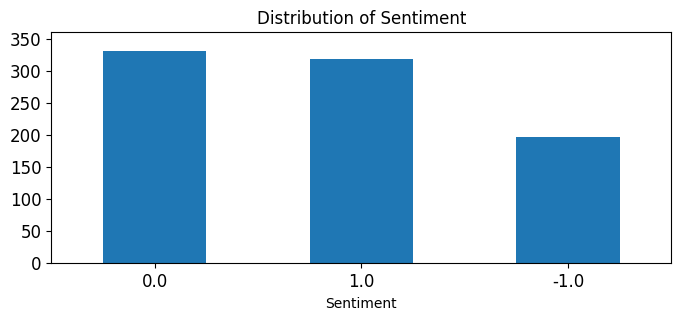

In [355]:


print(data.sentiment.value_counts())

data.sentiment.value_counts().plot(kind='bar',
                                   title='Distribution of Sentiment',
                                   xlabel='Sentiment',
                                   ylim = [0, data.sentiment.value_counts().max()+30], 
                                   rot = 0, fontsize = 12, figsize = (8,3))
plt.show()





sentiment
 0.0    44
 1.0    32
-1.0    24
Name: count, dtype: int64


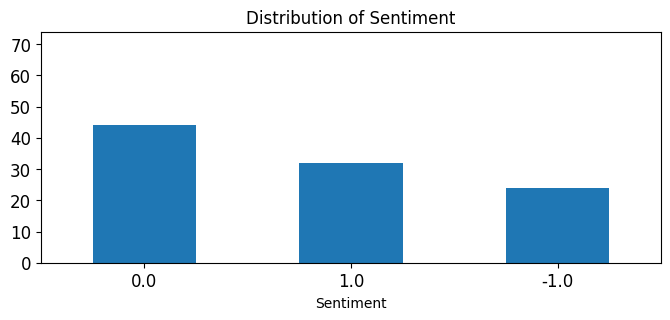

In [356]:
print(data_sample.sentiment.value_counts())

data_sample.sentiment.value_counts().plot(kind='bar',
                                   title='Distribution of Sentiment',
                                   xlabel='Sentiment',
                                   ylim = [0, data_sample.sentiment.value_counts().max()+30], 
                                   rot = 0, fontsize = 12, figsize = (8,3))
plt.show()



<Axes: title={'center': 'sentiment distribution'}, xlabel='sentiment'>

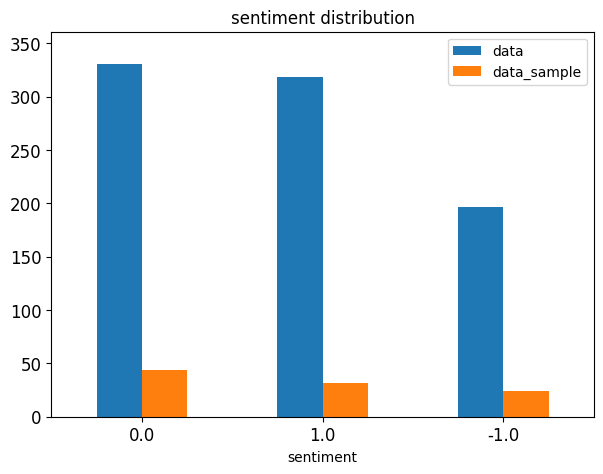

In [357]:
new_df=pd.DataFrame({"data":data.sentiment.value_counts(),
                    "data_sample":data_sample.sentiment.value_counts()})
new_df.plot(kind='bar', title = 'sentiment distribution',
               ylim = [0, max(data.sentiment.value_counts().max(),data_sample.sentiment.value_counts().max())+30], 
               rot = 0, fontsize = 12, figsize = (7,5))

It seems the distribution from data and sampling one are slightly different

### Feature creation

create feature: word frequency

In [358]:

import nltk
nltk.download("punkt") #斷句model
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\呂佳芸\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\呂佳芸\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [359]:
data['unigrams'] = data['text'].apply(lambda x: dmh.tokenize_text(x))


C:\Users\呂佳芸\AppData\Local\Temp\ipykernel_29856\3033617486.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [360]:
data[:5]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
4                   [He, didnât, say, thank, you, .]
Name: unigrams, dtype: object

### Feature subset selection

In [361]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.text) #learn the vocabulary and return document-term matrix
print(data_counts[1])

  (np.int32(0), np.int32(3741))	1
  (np.int32(0), np.int32(394))	1
  (np.int32(0), np.int32(2051))	2
  (np.int32(0), np.int32(2343))	1
  (np.int32(0), np.int32(4303))	1
  (np.int32(0), np.int32(1183))	1
  (np.int32(0), np.int32(3907))	1
  (np.int32(0), np.int32(1429))	1
  (np.int32(0), np.int32(2436))	1
  (np.int32(0), np.int32(546))	1
  (np.int32(0), np.int32(1097))	1
  (np.int32(0), np.int32(178))	2
  (np.int32(0), np.int32(3673))	1
  (np.int32(0), np.int32(2189))	1
  (np.int32(0), np.int32(3896))	1
  (np.int32(0), np.int32(1591))	1
  (np.int32(0), np.int32(2915))	1
  (np.int32(0), np.int32(2680))	1
  (np.int32(0), np.int32(899))	1
  (np.int32(0), np.int32(3519))	1
  (np.int32(0), np.int32(1432))	2
  (np.int32(0), np.int32(3841))	1
  (np.int32(0), np.int32(2955))	1


Now we delete some meaningless words with function from countvector

In [362]:
analyze = count_vect.build_analyzer()

for i in data.text:
    analyze(i)


count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.text) #learn the vocabulary and return document-term matrix
print(data_counts)

  (np.int32(0), np.int32(701))	1
  (np.int32(0), np.int32(2742))	1
  (np.int32(0), np.int32(3287))	1
  (np.int32(1), np.int32(3741))	1
  (np.int32(1), np.int32(394))	1
  (np.int32(1), np.int32(2051))	2
  (np.int32(1), np.int32(2343))	1
  (np.int32(1), np.int32(4303))	1
  (np.int32(1), np.int32(1183))	1
  (np.int32(1), np.int32(3907))	1
  (np.int32(1), np.int32(1429))	1
  (np.int32(1), np.int32(2436))	1
  (np.int32(1), np.int32(546))	1
  (np.int32(1), np.int32(1097))	1
  (np.int32(1), np.int32(178))	2
  (np.int32(1), np.int32(3673))	1
  (np.int32(1), np.int32(2189))	1
  (np.int32(1), np.int32(3896))	1
  (np.int32(1), np.int32(1591))	1
  (np.int32(1), np.int32(2915))	1
  (np.int32(1), np.int32(2680))	1
  (np.int32(1), np.int32(899))	1
  (np.int32(1), np.int32(3519))	1
  (np.int32(1), np.int32(1432))	2
  (np.int32(1), np.int32(3841))	1
  :	:
  (np.int32(843), np.int32(3916))	1
  (np.int32(843), np.int32(706))	1
  (np.int32(843), np.int32(4288))	1
  (np.int32(843), np.int32(3151))	1
  (np.

In [363]:
data_counts.shape

(847, 4411)

term-document matrix

[654, 114, 25, 759, 281, 250, 228, 142, 754, 104, 692, 758, 558, 89, 604]
term_idx: [178, 294, 332, 379, 394, 412, 492, 684, 689, 706, 806, 1228, 1429, 1628, 1663]
[[ 0  1  1  1  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  1  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2 11  2  0  1  1  0  1  2  0  0  0  0  0]
 [ 0  1  0  0  0  1  0  0  0  1  0  0  0  1  0]
 [ 0  0  1  0  0  0  0  0  2  1  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  1  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  1  0  0  0  0  0  0  0  1  0  0  0  0]]


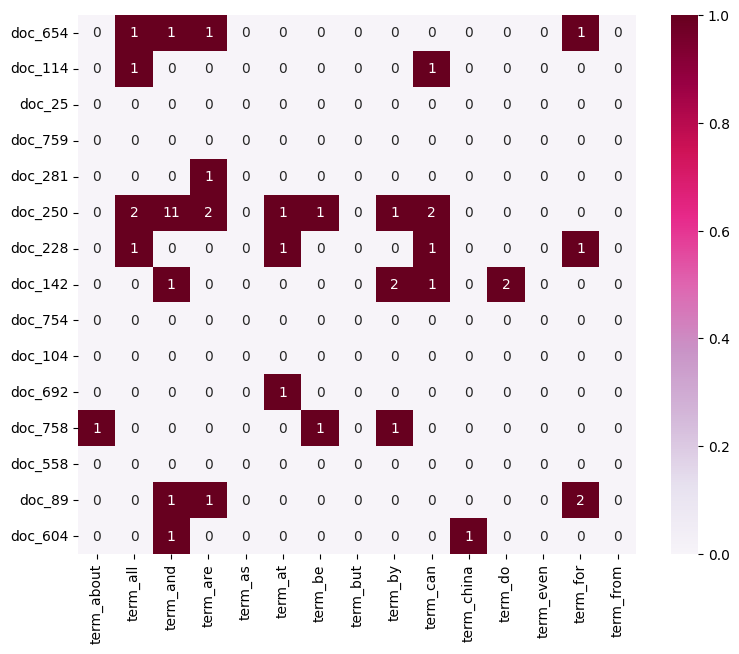

In [364]:
import seaborn as sns
import random
import numpy as np


random.seed(42)
doc_idx=random.sample(range(len(data)),15)
term_frequencies = np.asarray(data_counts.sum(axis=0))[0]
term_idx=[]
j=0
for i in range(len(term_frequencies)):
    if term_frequencies[i]>50:
        j+=1
        term_idx.append(i)
    if j==15:
        break

print(doc_idx)
print("term_idx:",term_idx)
plot_x=["term_"+str(i) for i in count_vect.get_feature_names_out()[term_idx]]
plot_y=["doc_"+ str(i) for i in doc_idx]
plot_z=data_counts[np.ix_(doc_idx, term_idx)].toarray()
print(plot_z)
df_todraw=pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

plt.subplots(figsize=(9, 7))
ax=sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Attribure transformation

term frequency

In [365]:
term_frequencies = np.asarray(data_counts.sum(axis=0))[0]
print(term_frequencies)

[4 6 1 ... 1 1 1]


Sort the term frequencies in descending order

In [366]:
import plotly.express as pe
term_index=np.argsort(term_frequencies)[::-1][:300]

plot_x=count_vect.get_feature_names_out()[term_index]
plot_y=term_frequencies[term_index]

fig=pe.bar(x=plot_x,y=plot_y)
fig.show()

Change the frequency variable into log-scale

In [367]:
import math
term_index=np.argsort(term_frequencies)[::-1][:300]

plot_x=count_vect.get_feature_names_out()[term_index]
plot_y=term_frequencies[term_index]
y_values=[math.log(i) for i in plot_y]



fig=pe.bar(x=plot_x,
             y=y_values)
fig.show()





# Phase 2

In [368]:
### Begin Assignment Here

##  5.4.2 Finding frequent patterns

In [369]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = data['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    category_dfs[category] = data[data['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    words = count_vect.get_feature_names_out()
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [370]:
categories

array([-1.,  1.,  0.])

In [371]:
category_number=0 
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category -1.0:


,01378,027,10,100,100k,100x,11,12,125,13â,...,yikes,yippee,yo,you,your,yourselves,youtube,youâ,yup,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


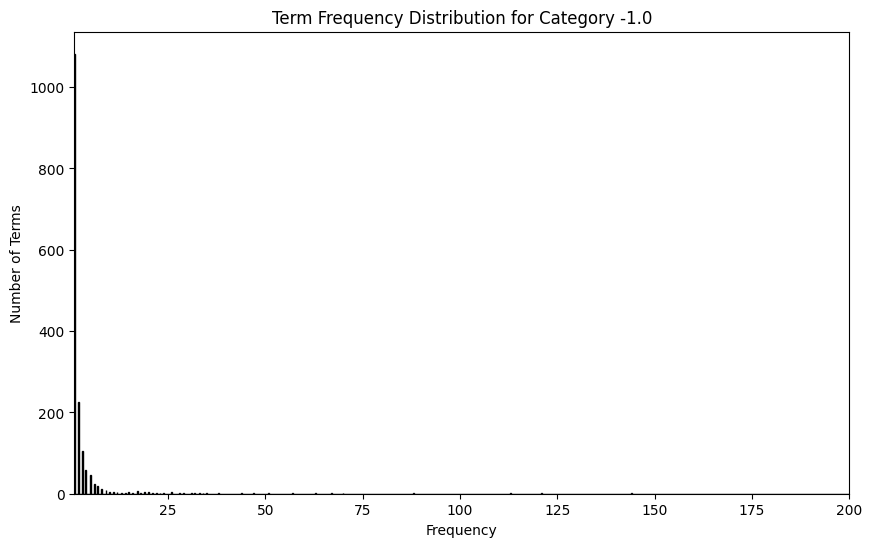

In [372]:
 # Sum over all documents to get total frequency for each word
category_number=0 #can change it from 0 to 2
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=1000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [373]:
category_number=0 #You can change it from 0 to 2
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: -1.0
Number of terms in top 5%: 82
Filtered terms: ['the', 'to', 'and', 'is', 'it', 'in', 'of', 'that', 'this', 'for', 'you', 'he', 'are', 'if', 'so', 'trump', 'be', 'on', 'they', 'will', 'but', 'as', 'us', 'not', 'just', 'with', 'like', 'have', 'at', 'what', 'all', 'his', 'was', 'about', 'think', 'my', 'can', 'an', 'now', 'or', 'people', 'even', 're', 'going', 'has', 'when', 'their', 'china', 'bad', 'no', 'more', 'tariffs', 'fuck', 'from', 'him', 'market', 'we', 'than', 'up', 'money', 'do', 'how', 'see', 'one', 'by', 'only', 'silver', 'out', 'there', 'why', 'go', 'itâ', 'long', 'still', 'me', 'down', 'our', 'some', 'time', 'iâ', 'shit', 'want']


In [374]:
sorted_counts
sorted_indices

array([1439, 1476,  101, ...,   38, 1172, 1630])

In [375]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0) 

np.int64(236)

In [376]:
category_number=0 #change it from 0 to 2
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: -1.0
Number of terms in bottom 1%: 16
Filtered terms: ['writing', 'reaction', '95', '9k', 'ability', 'reacts', 'abolish', 'above', '4m', '50', '500', '600k', 'reversal', '6k', '77', '7s']


In [377]:
sorted_counts
sorted_indices

array([1630, 1172,   38, ...,  101, 1476, 1439])

In [378]:
category_number=0 #change it from 0 to 2

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    word_sums = term_document_df.sum(axis=0)
    sorted_words = word_sums.sort_values()
    
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}')
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') 
    return term_document_df.drop(columns=words_to_remove)

term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For category -1.0 we filter the following words:
Bottom 1.0% words: 
writing     1
reaction    1
95          1
9k          1
ability     1
reacts      1
abolish     1
above       1
4m          1
50          1
500         1
600k        1
reversal    1
6k          1
77          1
7s          1
dtype: int64
Top 5.0% words: 
want      9
shit      9
iâ        9
time      9
some      9
       ... 
it       88
is      113
and     121
to      144
the     236
Length: 82, dtype: int64

For category 1.0 we filter the following words:
Bottom 1.0% words: 
2c_wiki_recommendations    1
2fapps                     1
2k                         1
wouldn                     1
wow                        1
wrinkled                   1
wrote                      1
ww2                        1
2024                       1
2045                       1
208                        1
22rate                     1
23                         1
235                        1
28                         1
2c_books       

,01378,027,10,100,100k,100x,11,12,125,13â,...,yields,yikes,yippee,yo,your,yourselves,youtube,youâ,yup,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### >>> **Exercise 16 :** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

In [379]:
#similarity: 
# the top 5% frequent words are mostly common words like 'the', 'to', 'and', 'is', etc., which appear frequently across all categories. 
# The bottom filtered words tend to be more specific or less common terms that may not contribute significantly to the overall analysis. This pattern is consistent across different sentiment categories, indicating that common words are universally prevalent while less frequent words vary more by category.

#differemce:
#the specific words that are filtered out in the bottom 1% differ across categories.

In [380]:
import builtins

_orig_open = open

def safe_open(*args, **kwargs):
    if len(args) > 0 and isinstance(args[0], str) and args[0].endswith('.csv'):
        kwargs['encoding'] = 'latin-1'   # Force Latin-1
        kwargs['errors'] = 'ignore'      # Ignore bad characters
    return _orig_open(*args, **kwargs)


builtins.open = safe_open

In [381]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_str=str(category)
    print(category_str)
    category_safe = category_str.replace('.', '_')
    print("Safe:",category_safe)
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

-1.0
Safe: -1_0
1.0
Safe: 1_0
0.0
Safe: 0_0


Database size (total no of transactions) : 196
Number of items : 1558
Minimum Transaction Size : 1
Average Transaction Size : 13.091836734693878
Maximum Transaction Size : 66
Standard Deviation Transaction Size : 10.84123527743455
Variance in Transaction Sizes : 118.13511250654108
Sparsity : 0.9915970239186818


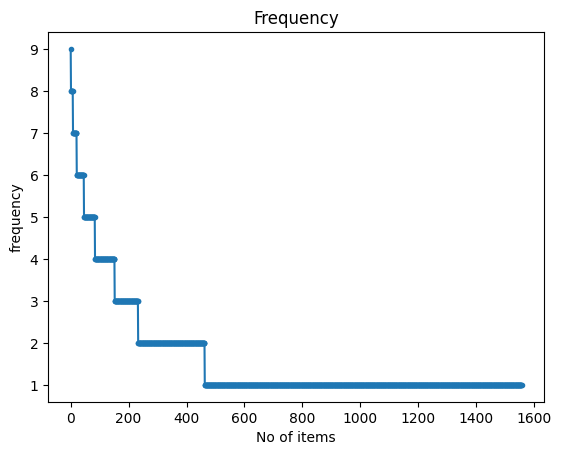

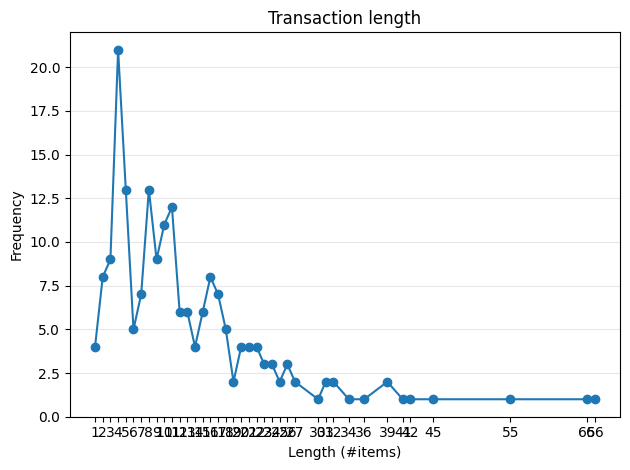

In [382]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_-1_0.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 317
Number of items : 2977
Minimum Transaction Size : 1
Average Transaction Size : 16.839116719242902
Maximum Transaction Size : 200
Standard Deviation Transaction Size : 22.42638113536484
Variance in Transaction Sizes : 504.5341612426626
Sparsity : 0.9943435953244062


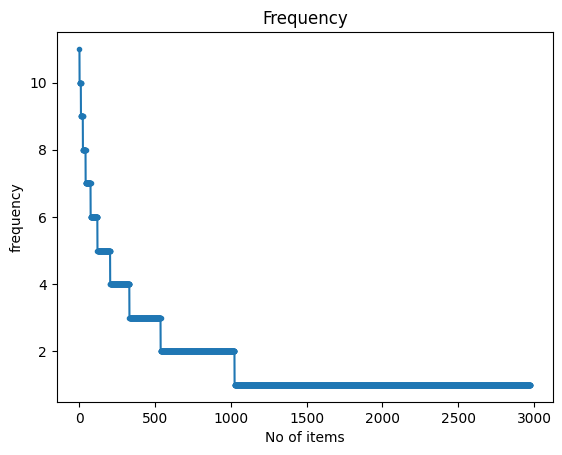

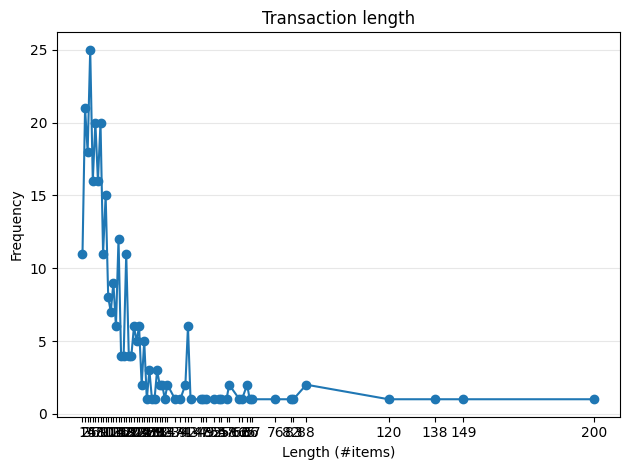

In [383]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_1_0.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 325
Number of items : 1212
Minimum Transaction Size : 1
Average Transaction Size : 5.993846153846154
Maximum Transaction Size : 31
Standard Deviation Transaction Size : 4.771707545460878
Variance in Transaction Sizes : 22.83946818613485
Sparsity : 0.9950545823813151


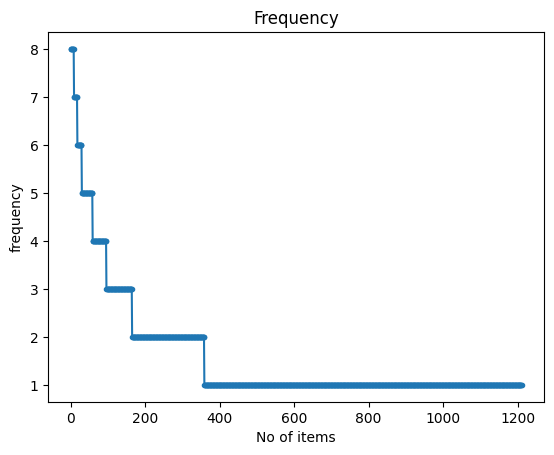

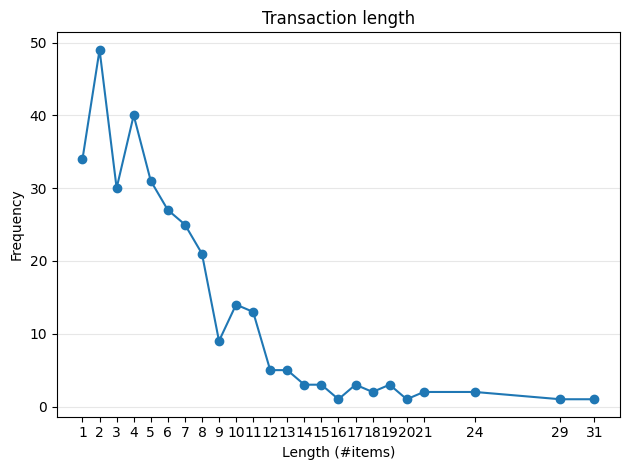

In [384]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_0_0.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [385]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=5
obj1 = alg.FPGrowth(iFile='td_freq_db_-1_0.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_negative= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_negative))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 84
Runtime: 0.003999948501586914


In [386]:
frequentPatternsDF_negative

,Patterns,Support
0,looking,5
1,buying,5
2,literally,5
3,these,5
4,happening,5
...,...,...
79,been,8
80,them,8
81,after,8
82,get,8


In [387]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=5
obj1 = alg.FPGrowth(iFile='td_freq_db_1_0.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_positive= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_positive))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 220
Runtime: 0.009002447128295898


In [388]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=5
obj1 = alg.FPGrowth(iFile='td_freq_db_0_0.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_neutral= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_neutral))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 2096
Runtime: 0.003998994827270508


### >>> **Exercise 17 :** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the '-1.0' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance. For this you can find the following google collabs for reference provided by their github repository here: [FAE Top-K](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/topk/FAE.ipynb) and [MaxFPGrowth](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/maximal/MaxFPGrowth.ipynb)

#### MaxFPGrowth

In [389]:
#  minimum support thresholds of 3

from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=3
obj3 = alg.FPGrowth(iFile='td_freq_db_-1_0.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_negative= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_negative))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime



Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 245
Runtime: 0.0069849491119384766


In [390]:
#  minimum support thresholds of 6

from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=6
obj3 = alg.FPGrowth(iFile='td_freq_db_-1_0.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_negative= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_negative))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime



Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 46
Runtime: 0.0030007362365722656


In [391]:
#  minimum support thresholds of 9

from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile='td_freq_db_-1_0.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_negative= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_negative))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime



Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 1
Runtime: 0.0020003318786621094


#### FAE Top-K

In [392]:
from PAMI.frequentPattern.topk import FAE as alg
k=300
obj_fae = alg.FAE(iFile='td_freq_db_-1_0.csv', k=k)
obj_fae.mine()
freqPatternDF_fae = obj_fae.getPatternsAsDataFrame()
print('Runtime: ' + str(obj_fae.getRuntime()))
freqPatternDF_fae

 TopK frequent patterns were successfully generated using FAE algorithm.
Runtime: 0.052001237869262695


,Patterns,Support
0,too,9
1,economy,8
2,who,8
3,doing,8
4,been,8
...,...,...
295,backed,2
296,chair,2
297,coin,2
298,crash,2


In [393]:
from PAMI.frequentPattern.topk import FAE as alg
k=200
obj_fae = alg.FAE(iFile='td_freq_db_-1_0.csv', k=k)
obj_fae.mine()
freqPatternDF_fae = obj_fae.getPatternsAsDataFrame()
print('Runtime: ' + str(obj_fae.getRuntime()))
freqPatternDF_fae

 TopK frequent patterns were successfully generated using FAE algorithm.
Runtime: 0.015522003173828125


,Patterns,Support
0,too,9
1,economy,8
2,who,8
3,doing,8
4,been,8
...,...,...
195,puts,3
196,30,3
197,fake,3
198,maybe,3


In [394]:
from PAMI.frequentPattern.topk import FAE as alg
k=100
obj_fae = alg.FAE(iFile='td_freq_db_-1_0.csv', k=k)
obj_fae.mine()
freqPatternDF_fae = obj_fae.getPatternsAsDataFrame()
print('Runtime: ' + str(obj_fae.getRuntime()))
freqPatternDF_fae

 TopK frequent patterns were successfully generated using FAE algorithm.
Runtime: 0.006020069122314453


,Patterns,Support
0,too,9
1,economy,8
2,who,8
3,doing,8
4,been,8
...,...,...
95,know,4
96,something,4
97,law,4
98,rule,4


#### Difference 

In [395]:
## Diffrence
#In FAE Top-K, as the value of k decreases from 300 to 100, the runtime generally decreases as well. 
#In FPGrowth, as the minimum support threshold increases from 3 to 9, the runtime decreases while the number of patterns found also decreases.

In [396]:
#Also, in this dataset, if we choose a very high minimum support threshold in FPGrowth, we may end up with very few or no frequent patterns.
# Conversely, in FAE Top-K, selecting a very low k value may lead to a longer runtime as the algorithm has to explore more potential patterns to find the top k frequent ones.

## 5.5 Dimensionality Reduction

In [397]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_negative, frequentPatternsDF_neutral, frequentPatternsDF_positive]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                                 Patterns  Support
2290                               always       10
2285                              country       10
2284                               pretty       10
2286                                where       10
2287                              america       10
...                                   ...      ...
46                   pepeusd\tcap\tcharts        5
47     highlights\tbtcusd\tethusd\tcharts        5
48    highlights\tbtcusd\tpepeusd\tcharts        5
49        highlights\tbtcusd\tcap\tcharts        5
2                                     did        5

[2291 rows x 2 columns]
Number of patterns discarded: 26


In [398]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
data_tdm = count_vect.fit_transform(data['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
data['tokenized_text'] = data['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=data.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = data['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(data_tdm.toarray(), columns=terms, index=data.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

C:\Users\呂佳芸\AppData\Local\Temp\ipykernel_29856\426645209.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,00,000,01378,02,027,03,06,08,10,100,...,btcusd\tethusd\tcharts,btcusd\tpepeusd\tcharts,btcusd\tcap\tcharts,ethusd\tpepeusd\tcharts,ethusd\tcap\tcharts,pepeusd\tcap\tcharts,highlights\tbtcusd\tethusd\tcharts,highlights\tbtcusd\tpepeusd\tcharts,highlights\tbtcusd\tcap\tcharts,did
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [399]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

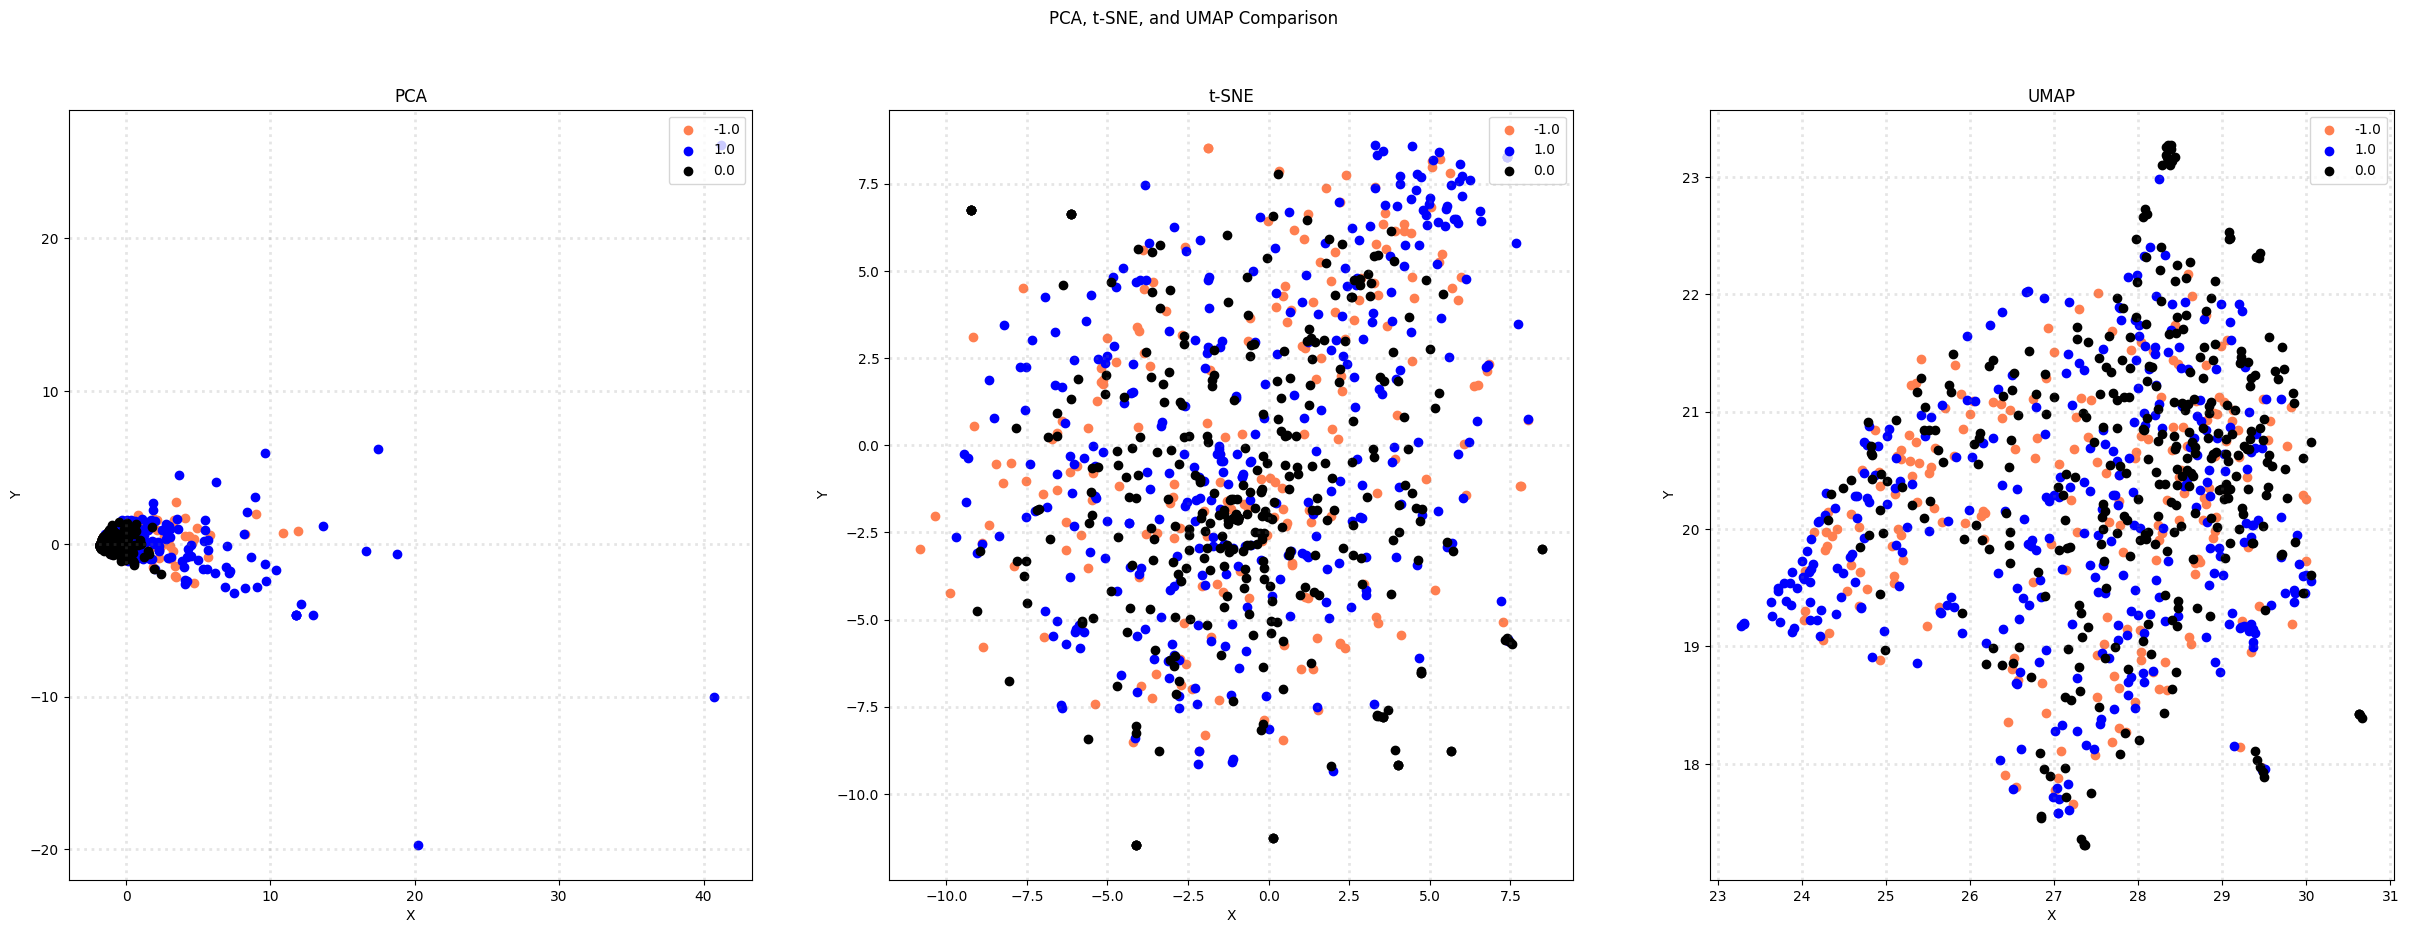

In [400]:
# Plot the results in subplots
col = ['coral', 'blue', 'black']
categories =data['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[data['sentiment'] == category].T[0]
        ys = X_reduced[data['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [401]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

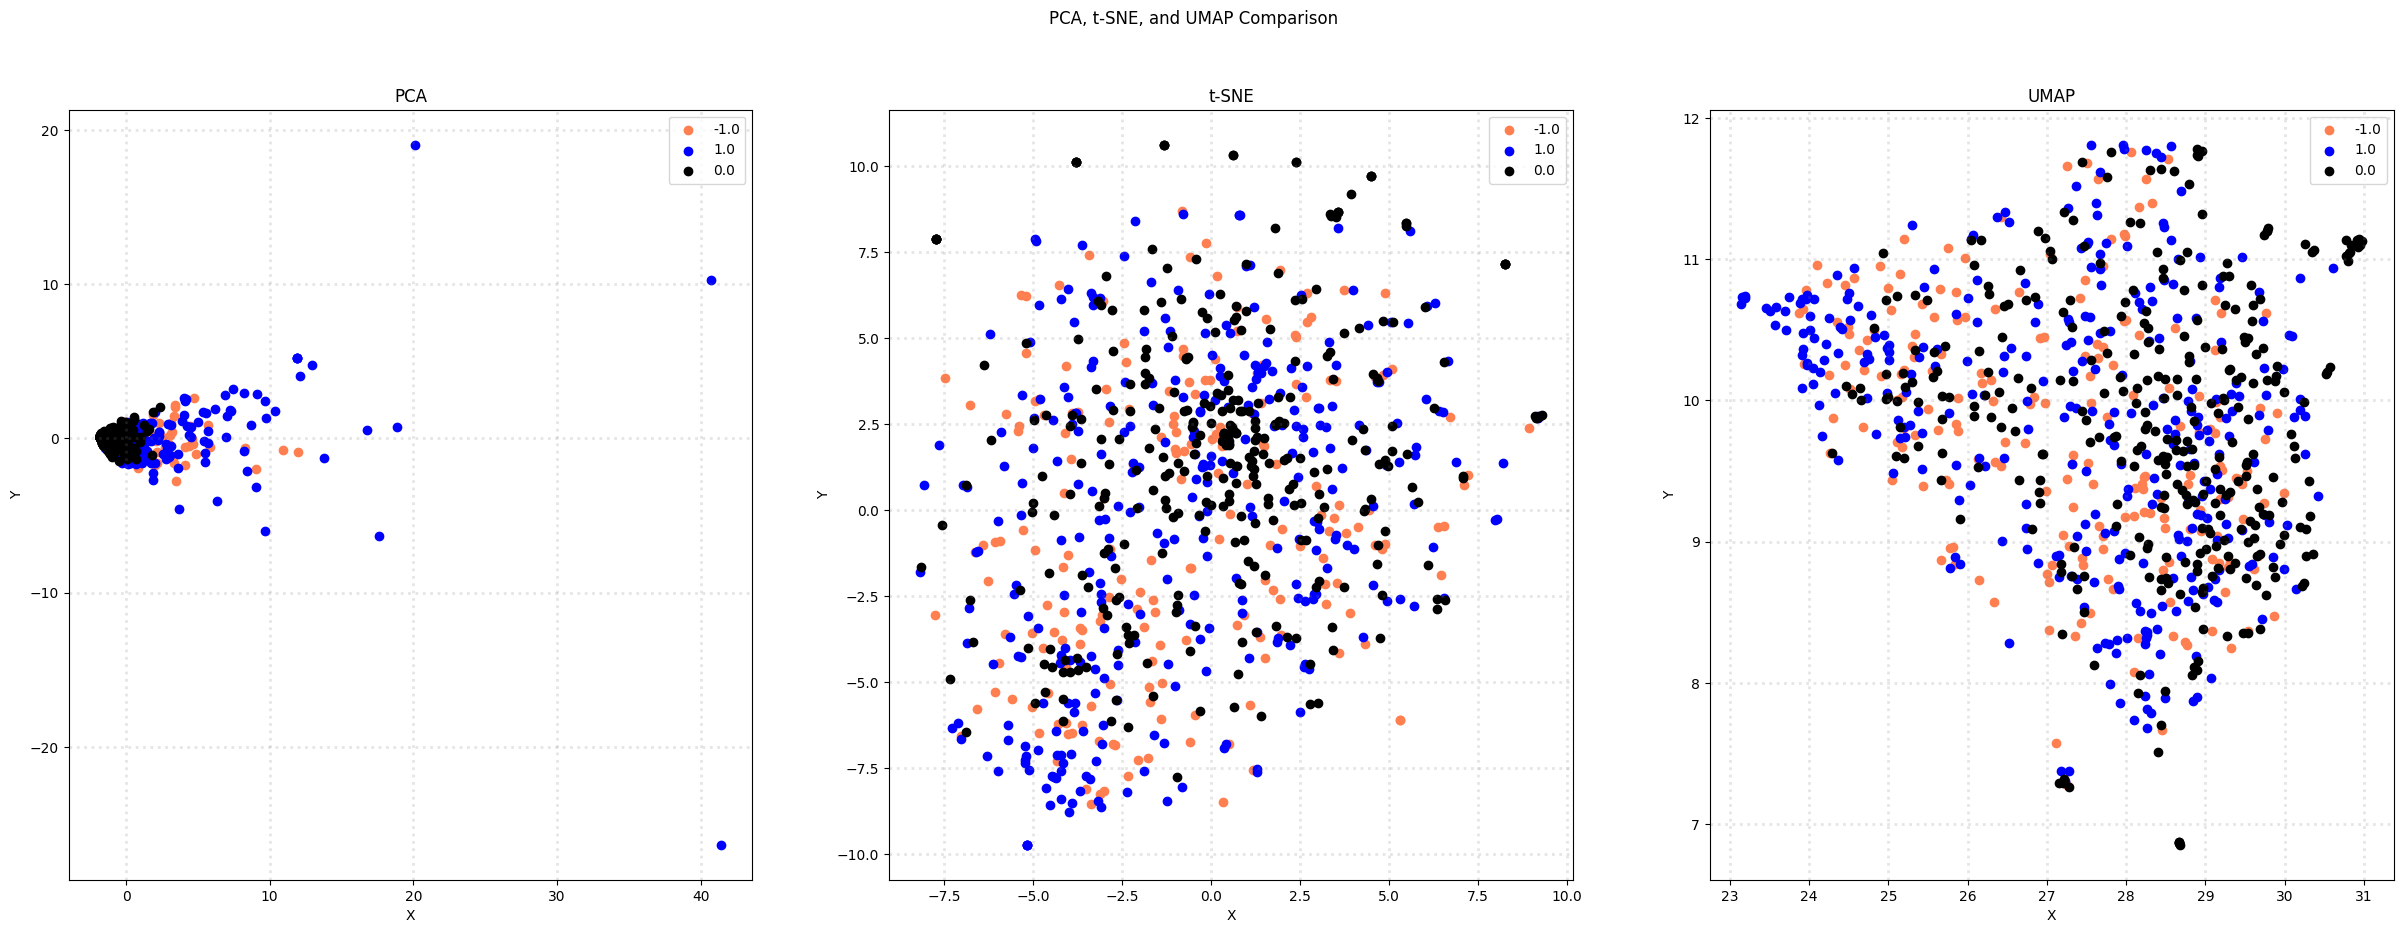

In [402]:
# Plot the results in subplots
col = ['coral', 'blue', 'black']
categories = data['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[data['sentiment'] == category].T[0]
        ys = X_reduced[data['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

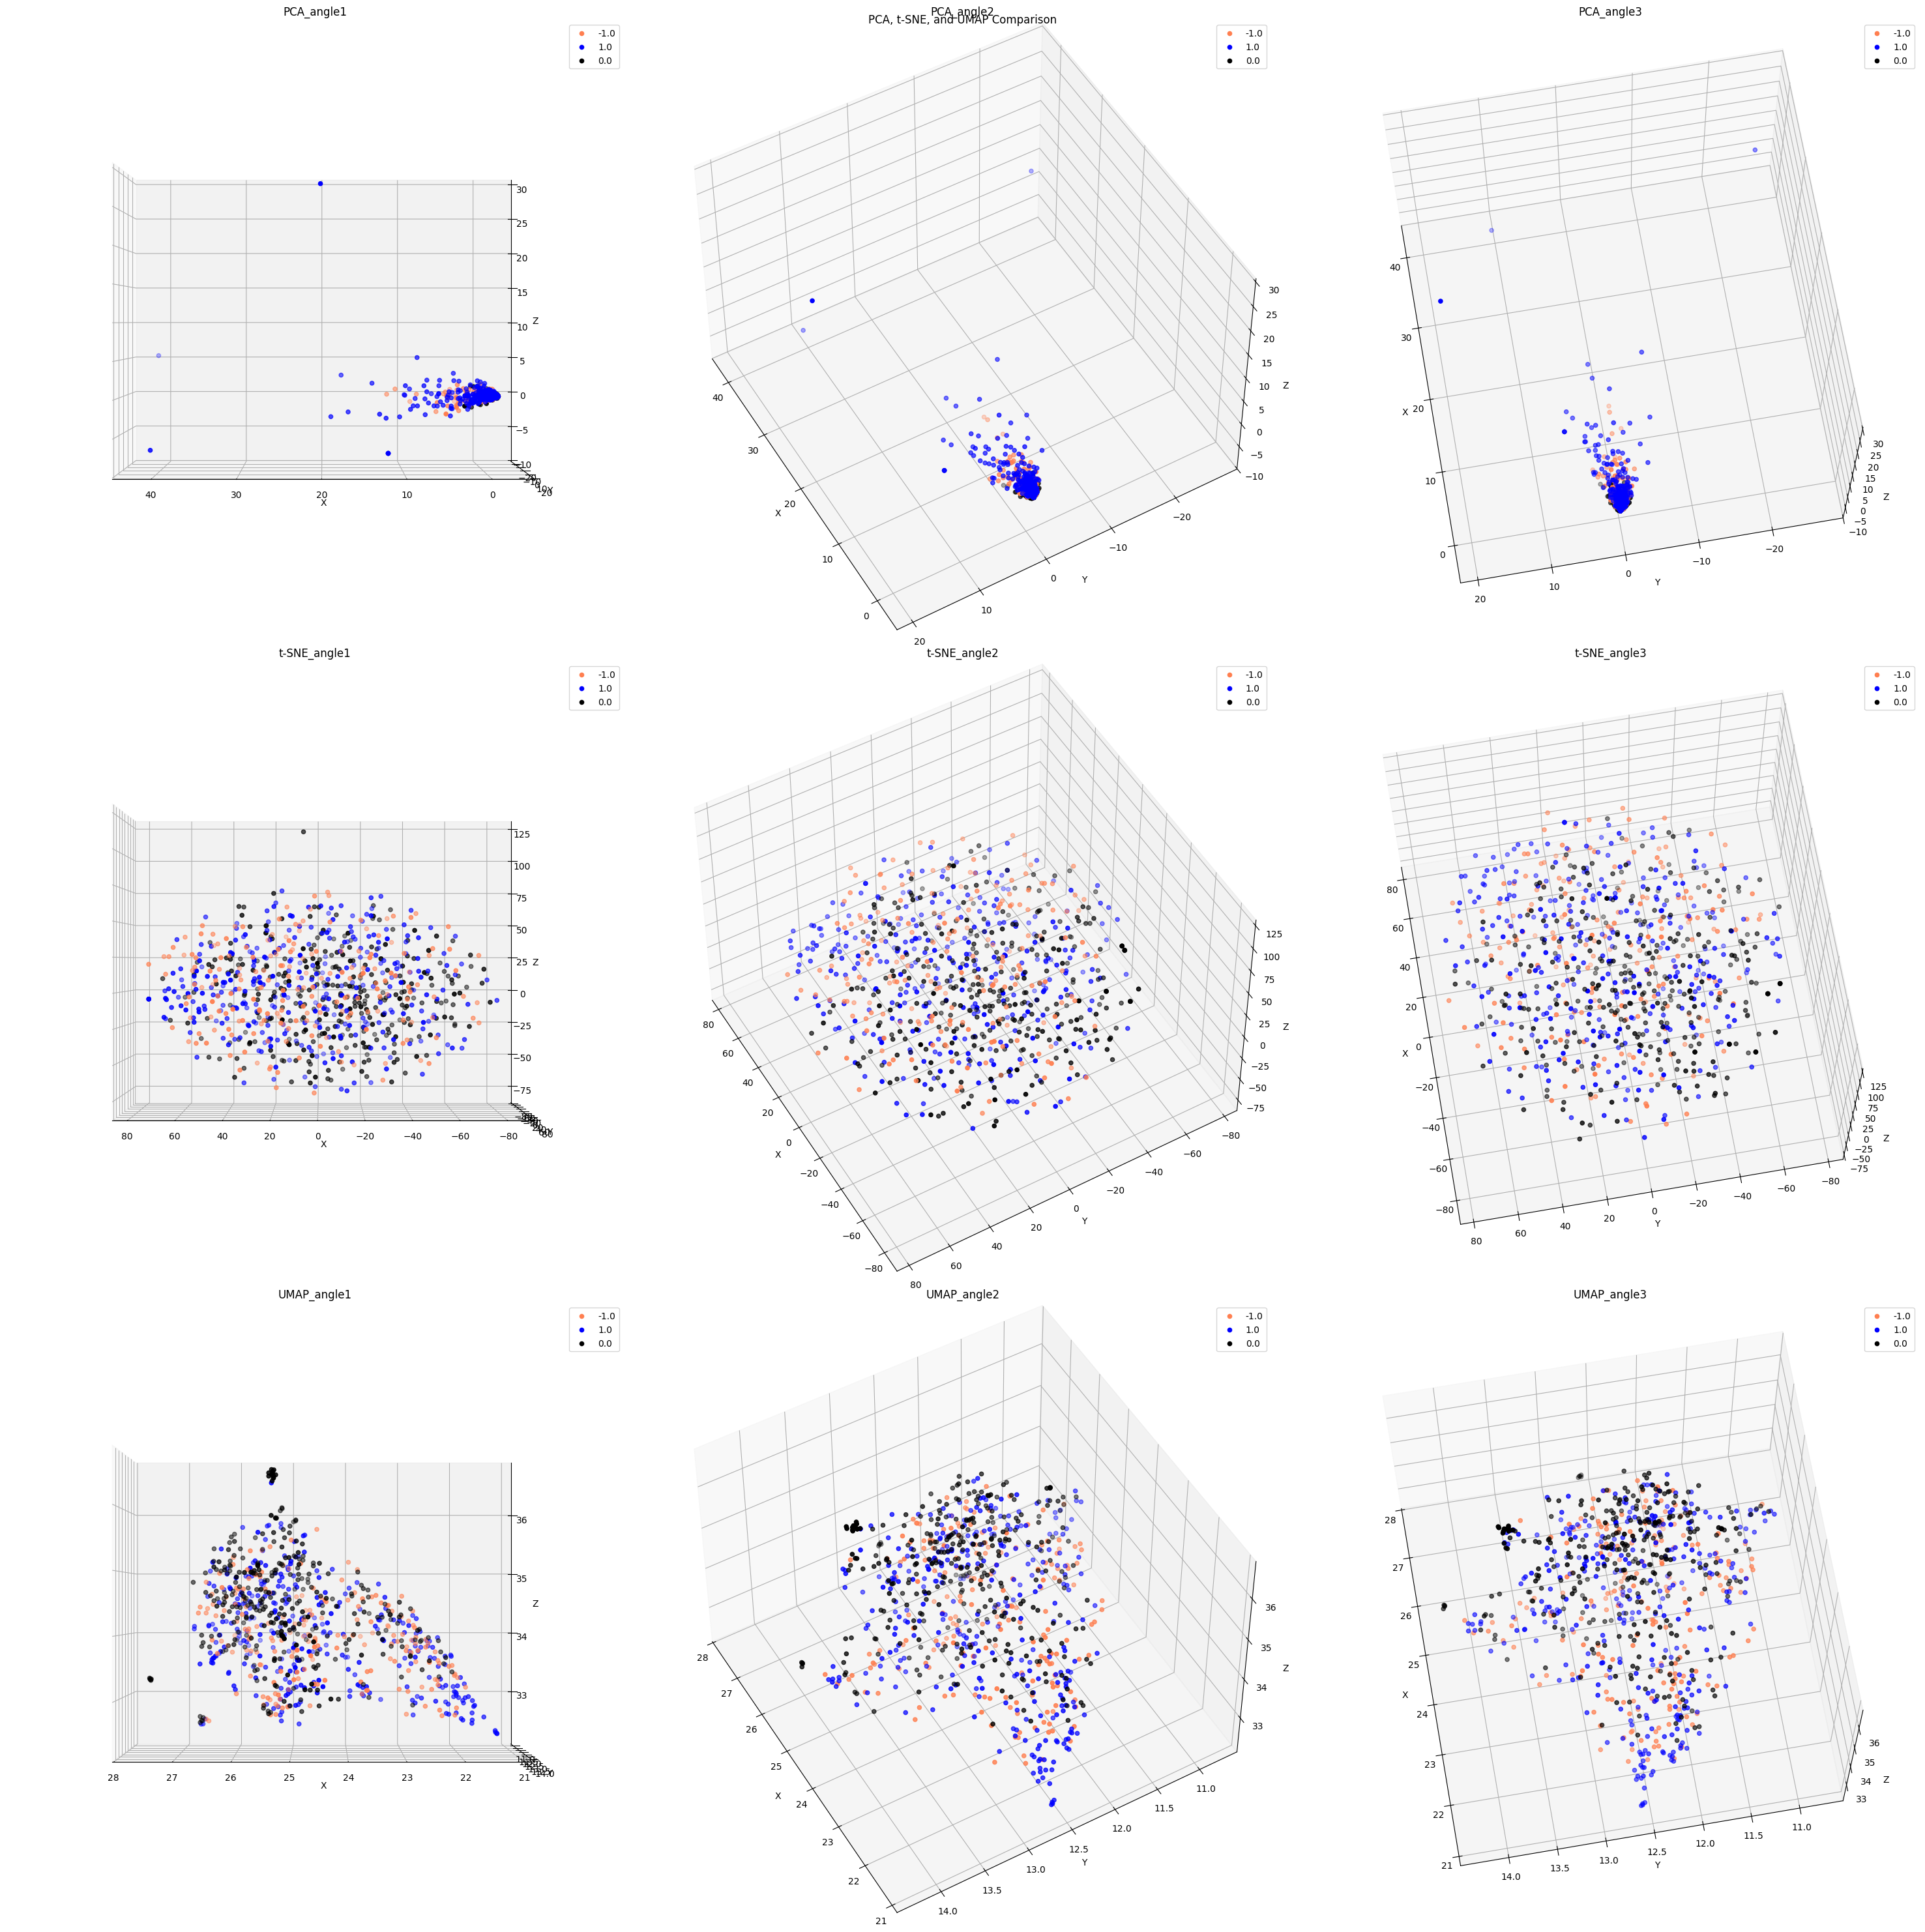

In [403]:
from mpl_toolkits.mplot3d import Axes3D
X_pca_3 = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_3 = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_3 = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

col=['coral', 'blue', 'black']
categories = data['sentiment'].unique() 

fig=plt.figure(figsize=(30, 30))
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

angles=[(0, 90), (50, 150), (70, 170)]

def plot_scatter_3D(ax, X_reduced, title, elev, azim):
    for c, category in zip(col, categories):
        xs=X_reduced[data['sentiment'] == category].T[0]
        ys=X_reduced[data['sentiment'] == category].T[1]
        zs=X_reduced[data['sentiment'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')
    ax.view_init(elev=elev, azim=azim)

# Create scatter plots for PCA, t-SNE, and UMAP in different 3 angles
for i, (elev, azim) in enumerate(angles):     #(elev, azim) are angle combination
    ax1=fig.add_subplot(3, 3, 1 + i, projection='3d') #當 i=0, 1, 2 時，子圖位置分別是 1, 2, 3
    plot_scatter_3D(ax1, X_pca_3, f'PCA_angle{i+1}', elev, azim)

    ax2=fig.add_subplot(3, 3, 4 + i, projection='3d')
    plot_scatter_3D(ax2, X_tsne_3, f't-SNE_angle{i+1}', elev, azim)

    ax3=fig.add_subplot(3, 3, 7 + i, projection='3d')
    plot_scatter_3D(ax3, X_umap_3, f'UMAP_angle{i+1}', elev, azim)

plt.tight_layout()
plt.show()

## 5.6 Discretization and Binarization
 

### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [404]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

mlb.fit(data.sentiment)


LabelBinarizer()

In [405]:
data['bin_category_name'] = mlb.transform(data['sentiment']).tolist()
#It works!

C:\Users\呂佳芸\AppData\Local\Temp\ipykernel_29856\1402917583.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [406]:
data[0:10]

,type,datetime,subreddit,title,upvotes,text,subjectivity,polarity,sentiment,entities,label,unigrams,tokenized_text,bin_category_name
0,comment,2025-04-11 17:29:56,wallstreetbets,Retardation is on the menu boys! WSB is so back,0,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0,"[Calls, on, retards]","{Calls, on, retards}","[1, 0, 0]"
1,comment,2025-04-12 1:12:19,wallstreetbets,Retail giant TARGET has now declined for 10 co...,-15,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0,"[Stunt, as, in, like, why, did, they, even, ma...","{Stunt, even, No, did, deal, like, place?, as,...","[0, 0, 1]"
2,comment,2025-04-10 15:09:41,StockMarket,How do you feel about a sitting president maki...,1,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0,"[Seeing, lots, of, red, in, the, ticker, .]","{ticker., red, Seeing, of, the, in, lots}","[0, 1, 0]"
3,post,2023-08-30 17:12:55,stockstobuytoday,Who knows more? $VMAR,30,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0,"[Vision, Marine, Technologies, Inc., is, rewri...","{have, for, Editron, mph!, it's, Systems, Powe...","[0, 0, 1]"
4,comment,2025-04-11 14:48:05,StockMarket,The Trump administration is begging Xi Jinping...,1,He didnât say thank you.,0.000000,0.000000,0.0,[],-1.0,"[He, didnât, say, thank, you, .]","{He, didnât, say, thank, you.}","[0, 1, 0]"
5,comment,2025-04-12 2:19:03,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,16,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,0.250000,1.0,"['tonight', 'puss']",0.0,"[Hoping, to, ejaculate, in, wet, warm, puss, t...","{to, me, Hoping, wish, in, puss, wet, tonight,...","[0, 0, 1]"
6,comment,2025-04-11 12:37:23,stocks,Is the market in complete denial right now?,5,Trump will respond to china increasing their t...,0.380000,-0.108333,-1.0,"['JPow', 'Jerome', 'i', 'reporting', 'Trump', ...",-1.0,"[Trump, will, respond, to, china, increasing, ...","{their, see, increasing, reporting, even, brut...","[1, 0, 0]"
7,comment,2025-04-11 17:28:50,wallstreetbets,Retardation is on the menu boys! WSB is so back,-3,Confirmed not a trap. Its been like this for p...,0.700000,0.050000,1.0,"['Confirmed', 'mouth', 'word', 'trap']",0.0,"[Confirmed, not, a, trap, ., Its, been, like, ...","{have, for, Confirmed, spread, probably, mouth...","[0, 0, 1]"
8,comment,2021-02-01 15:36:32,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",1,Am I the only one seeing the cup & handle brea...,0.491818,0.057045,1.0,"['cup', 'Day', 'handle', 'pivot', 'Green', 'tr...",1.0,"[Am, I, the, only, one, seeing, the, cup, &, h...","{breakout, held, high., Perfectly, handle, was...","[0, 0, 1]"
9,comment,2021-12-31 16:29:49,stockstobuytoday,Any cheap stocks under $10?,2,HLGN is $10. Hurry and catch it now before it ...,0.000000,0.000000,0.0,"['HLGN', 'Hurry', 'moon']",1.0,"[HLGN, is, $, 10, ., Hurry, and, catch, it, no...","{to, Hurry, catch, moon!, now, HLGN, is, befor...","[0, 1, 0]"


# 6. Data Exploration

### >>> **Exercise 20 (take home):**
Try changing the texts reference for Text 1, Text 2, and Text 3. What do you observe from the Cosine Similarity results of different text references? following the modifications to texts reference, how can the results of the cosine similarity be interpreted?

In [407]:
negative_df = data[data['sentiment'] == -1]

# We retrieve 3 sentences from comp.graphics category for a random record
document_to_transform_a = []
random_record_a = negative_df.iloc[10]
random_record_a = random_record_a['text']
document_to_transform_a.append(random_record_a)

document_to_transform_b = []
random_record_b = negative_df.iloc[50]
random_record_b = random_record_b['text']
document_to_transform_b.append(random_record_b)

document_to_transform_c = []
random_record_c = negative_df.iloc[150]
random_record_c = random_record_c['text']
document_to_transform_c.append(random_record_c)

In [408]:
print(document_to_transform_a)
print(document_to_transform_b)
print(document_to_transform_c)

['If the "rule of law" wasn\'t a total joke, I might feel badly about it-- but it seems like nobody who matters does, so why should I?']
['cyberlux long term investment, you wont be upset']
['404 Brain not found. Hm... I get the feeling that these random nonsense tweets are AI generated in intervals. Are we in the Matrix after all?']


In [410]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_a = count_vect.transform(document_to_transform_a)
document_vector_count_b = count_vect.transform(document_to_transform_b)
document_vector_count_c = count_vect.transform(document_to_transform_c)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_a_bin = binarize(document_vector_count_a)
document_vector_count_b_bin = binarize(document_vector_count_b)
document_vector_count_c_bin = binarize(document_vector_count_c)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_a.todense())
print(document_vector_count_b.todense())
print(document_vector_count_c.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [411]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_a_b = cosine_similarity(document_vector_count_a, document_vector_count_b, dense_output=True)
cos_sim_count_a_c = cosine_similarity(document_vector_count_a, document_vector_count_c, dense_output=True)
cos_sim_count_b_c = cosine_similarity(document_vector_count_b, document_vector_count_c, dense_output=True)

cos_sim_count_a_a = cosine_similarity(document_vector_count_a, document_vector_count_a, dense_output=True)
cos_sim_count_b_b = cosine_similarity(document_vector_count_b, document_vector_count_b, dense_output=True)
cos_sim_count_c_c = cosine_similarity(document_vector_count_c, document_vector_count_c, dense_output=True)

# Print 
print("Cosine Similarity using count bw a and b: %(x)f" %{"x":cos_sim_count_a_b})
print("Cosine Similarity using count bw a and c: %(x)f" %{"x":cos_sim_count_a_c})
print("Cosine Similarity using count bw b and c: %(x)f" %{"x":cos_sim_count_b_c})

print("Cosine Similarity using count bw a and a: %(x)f" %{"x":cos_sim_count_a_a})
print("Cosine Similarity using count bw b and b: %(x)f" %{"x":cos_sim_count_b_b})
print("Cosine Similarity using count bw c and c: %(x)f" %{"x":cos_sim_count_c_c})

Cosine Similarity using count bw a and b: 0.000000
Cosine Similarity using count bw a and c: 0.070447
Cosine Similarity using count bw b and c: 0.000000
Cosine Similarity using count bw a and a: 1.000000
Cosine Similarity using count bw b and b: 1.000000
Cosine Similarity using count bw c and c: 1.000000


C:\Users\呂佳芸\AppData\Local\Temp\ipykernel_29856\116759124.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\呂佳芸\AppData\Local\Temp\ipykernel_29856\116759124.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\呂佳芸\AppData\Local\Temp\ipykernel_29856\116759124.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\呂佳芸\AppData\Local\Temp\ipykernel_29856\116759124.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar i

# 7. Data Classification

In [427]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(data[['sentiment', 'sentiment_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, data['sentiment'], test_size=0.3, random_state=42)

In [428]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5019607843137255

Classification Report:
               precision    recall  f1-score   support

    negative     0.3077    0.3137    0.3107        51
     neutral     0.7347    0.3429    0.4675       105
    positive     0.4935    0.7677    0.6008        99

    accuracy                         0.5020       255
   macro avg     0.5120    0.4748    0.4597       255
weighted avg     0.5557    0.5020    0.4879       255



### >>> **Exercise 21 (take home):**

Previously, we performed data augmentation by concatenating the original TDM with the pattern matrix. Use the augmented data to perform classification using Naive Bayes as in the previous steps.

In [425]:
#Model with augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(data[['sentiment', 'sentiment_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, data['sentiment'], test_size=0.3, random_state=42)

In [422]:
X_train

,00,000,01378,02,027,03,06,08,10,100,...,btcusd\tethusd\tcharts,btcusd\tpepeusd\tcharts,btcusd\tcap\tcharts,ethusd\tpepeusd\tcharts,ethusd\tcap\tcharts,pepeusd\tcap\tcharts,highlights\tbtcusd\tethusd\tcharts,highlights\tbtcusd\tpepeusd\tcharts,highlights\tbtcusd\tcap\tcharts,did
739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [423]:
X_test

,00,000,01378,02,027,03,06,08,10,100,...,btcusd\tethusd\tcharts,btcusd\tpepeusd\tcharts,btcusd\tcap\tcharts,ethusd\tpepeusd\tcharts,ethusd\tcap\tcharts,pepeusd\tcap\tcharts,highlights\tbtcusd\tethusd\tcharts,highlights\tbtcusd\tpepeusd\tcharts,highlights\tbtcusd\tcap\tcharts,did
457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
351,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [426]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.49411764705882355

Classification Report:
               precision    recall  f1-score   support

    negative     0.3333    0.1961    0.2469        51
     neutral     0.7750    0.2952    0.4276       105
    positive     0.4595    0.8586    0.5986        99

    accuracy                         0.4941       255
   macro avg     0.5226    0.4500    0.4244       255
weighted avg     0.5642    0.4941    0.4578       255



### >>> **Exercise 22 (take home):**

What differences can be observed between the results obtained using the original TDM and those obtained using the augmented TDM?

In [ ]:
# the augmented df shows a slight lower accuracy compared to the tdm df alone.

## Decision Tree Classifier

### >>> **Exercise 23 (take home):**

Why do you think the performance of Decision Trees is lower than that of Naive Bayes? Provide possible reasons.

In [ ]:
#Sparsity of the data: Text data creates a massive number of features (words), most of which are zero (sparse), make decision tree struggle to find good splits in this vast, sparse space.
#Overfitting: Decision Trees tend to overfit the unique patterns in the training data, leading poor performance on unseen data.

#Naive Bayes acts as a simple, effective frequency counter across all dimensions, often leading to a more stable and higher-performing model than the overfitting-prone, greedy, and complex splitting mechanism of a Decision Tree.

### >>> **Exercise 24 (take home):**

Implement using the augmented data, does the performance improve compared to that obtained with the original TDM? Is it better than Naive Bayes? Provide possible explanations for your observations.

In [430]:
# Decision Tree with augmented data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, data['sentiment'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.6196078431372549

Classification Report:
               precision    recall  f1-score   support

    negative     0.3750    0.3529    0.3636        51
     neutral     0.7117    0.7524    0.7315       105
    positive     0.6354    0.6162    0.6256        99

    accuracy                         0.6196       255
   macro avg     0.5740    0.5738    0.5736       255
weighted avg     0.6147    0.6196    0.6168       255



In [ ]:
# Decision tree has higher accuracy than naive bayes 

# Third part of Phase 2

Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn guide .

In [434]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
tfidf_data = tfidf_vect.fit_transform(data['text'])
tfidf_df = pd.DataFrame(tfidf_data.toarray(), columns=tfidf_vect.get_feature_names_out())
tfidf_df

,00,000,01378,02,027,03,06,08,10,100,...,yourself,yourselves,youtube,youâ,yoyo,yup,zero,zgld,zone,zsil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using

1. word frequency with multinomial NB


In [432]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

category_mapping = dict(data[['sentiment', 'sentiment_name']].drop_duplicates().values)

target_names = [category_mapping[label] for label in sorted(category_mapping.keys())] #dict: [key:value]

X_train, X_test, y_train, y_test = train_test_split(tdm_df, data['sentiment'], test_size=0.3, random_state=42) 

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5019607843137255

Classification Report:
               precision    recall  f1-score   support

    negative     0.3077    0.3137    0.3107        51
     neutral     0.7347    0.3429    0.4675       105
    positive     0.4935    0.7677    0.6008        99

    accuracy                         0.5020       255
   macro avg     0.5120    0.4748    0.4597       255
weighted avg     0.5557    0.5020    0.4879       255



2. TFIDF with multinomial Naive Bayes

In [435]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

category_mapping = dict(data[['sentiment', 'sentiment_name']].drop_duplicates().values)

target_names = [category_mapping[label] for label in sorted(category_mapping.keys())] #dict: [key:value]

X_train, X_test, y_train, y_test = train_test_split(tfidf_df, data['sentiment'], test_size=0.3, random_state=42) 

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5176470588235295

Classification Report:
               precision    recall  f1-score   support

    negative     1.0000    0.0392    0.0755        51
     neutral     0.7241    0.4000    0.5153       105
    positive     0.4513    0.8889    0.5986        99

    accuracy                         0.5176       255
   macro avg     0.7251    0.4427    0.3965       255
weighted avg     0.6734    0.5176    0.4597       255



3. TF-IDF with Gaussian NB

In [438]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

category_mapping = dict(data[['sentiment', 'sentiment_name']].drop_duplicates().values)

target_names = [category_mapping[label] for label in sorted(category_mapping.keys())] #dict: [key:value]

X_train, X_test, y_train, y_test = train_test_split(tfidf_df, data['sentiment'], test_size=0.3, random_state=42) 

gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)
y_pred = gnb_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5098039215686274

Classification Report:
               precision    recall  f1-score   support

    negative     0.2716    0.4314    0.3333        51
     neutral     0.8200    0.3905    0.5290       105
    positive     0.5403    0.6768    0.6009        99

    accuracy                         0.5098       255
   macro avg     0.5440    0.4995    0.4878       255
weighted avg     0.6017    0.5098    0.5178       255



Comment on the differences and when using augmentation with feature pattern.

In [ ]:
#When using  augmented_df, the accuracy decreases slightly compared to using tfidf_df.
#Also, using GaussianNB results in lower accuracy compared to MultinomialNB for both tfidf_df and augmented_df.
#In conclusion, we should choose MultinomialNB with tfidf_df for the best performance on this text classification task.

# Part 4 of Phase 2

 In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? 